In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("turkish_news.csv", index_col="id")
df.head()

,main_image,published,site,text,title,url
id,,,,,,
72337,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T13:33:00.000+02:00""","""diken.com.tr""","""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...","""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...","""http://www.diken.com.tr/yatirim-bankasi-dolar..."
72338,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T13:21:00.000+02:00""","""diken.com.tr""","""PİAR Araştırma: Adana ve Antalya’da ‘millet i...","""PİAR Araştırma: Adana ve Antalya’da ‘millet i...","""http://www.diken.com.tr/piar-arastirma-adana-..."
72339,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T12:20:00.000+02:00""","""diken.com.tr""","""Renaissance Capital: Merkez Bankası bu hafta ...","""Renaissance Capital: Merkez Bankası bu hafta ...","""http://www.diken.com.tr/renaissance-capital-m..."
72340,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T11:53:00.000+02:00""","""diken.com.tr""","""Ağrı’daki İYİ Partililerin istifa gerekçesi: ...","""Ağrı’daki İYİ Partililerin istifa gerekçesi: ...","""http://www.diken.com.tr/agridaki-iyi-partilil..."
72341,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T11:52:00.000+02:00""","""diken.com.tr""","""Otomobil pazarı iki ayda yarı yarıya eridi 04...","""Otomobil pazarı iki ayda yarı yarıya eridi""","""http://www.diken.com.tr/otomobil-pazari-iki-a..."


In [ ]:
haber_veriseti = df[["text"]]
haber_veriseti.head()

,text
id,
72337,"""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9..."
72338,"""PİAR Araştırma: Adana ve Antalya’da ‘millet i..."
72339,"""Renaissance Capital: Merkez Bankası bu hafta ..."
72340,"""Ağrı’daki İYİ Partililerin istifa gerekçesi: ..."
72341,"""Otomobil pazarı iki ayda yarı yarıya eridi 04..."


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Veri temizleme islemi icin bir fonksiyon tanımladım ve
# Bu fonksiyonu bütün veri üzerinde uyguladım
# Öncesinde noktalama isaretleri ve storwords kümelerini tanımladım
import re
import string
import nltk
from nltk.corpus import stopwords

nok_isaretleri_kümesi = string.punctuation
# nltk kütüphanesinin etkisiz kelimeler kümesini kullandım
etkisiz_kelimeler_kümesi = stopwords.words("turkish")
# stopwords kümesine istedigim kelimeleri ekledim
etkisiz_kelimeler_kümesi.extend(["bir", "kadar", "sonra"])

def veri_temizleme(metin):
    # Verisetimizdeki yeni satır karakterleri, boşluk karakteriyle değiştirir.
    metin = metin.replace("\\n", " ")
    # Kesme işareti ve sonrasındaki karakterlerin kaldırılması
    metin = re.sub("'(\w+)", "", metin)
    metin = re.sub("'", "", metin)
    metin = re.sub(r"'.*", "", metin)
    # Metindeki tüm harfleri küçük duruma getirir.
    metin = metin.lower()
    # Sayıların kaldırılması
    metin = re.sub("[0-9]+", "", metin)
    # Noktalama işaretlerinin kaldırılması
    metin = "".join(list(map(lambda x: x if x not in nok_isaretleri_kümesi else " ", metin)))
    # Etkisiz kelimelerin kaldırılması
    metin = " ".join([i for i in metin.split() if i not in etkisiz_kelimeler_kümesi])
    # Metinde tek kalan harflerin çıkartılması
    metin = " ".join([i for i in metin.split() if len(i) > 1])
    return metin

In [ ]:
haber_veriseti.iloc[5].text


'"Şubat ayında ihracat yüzde 3.7 arttı, ithalat yüzde 18.7 azaldı 04/03/2019 12:20\\nTicaret Bakanı Ruhsar Pekcan şubat ayında ihracatın yüzde 3.7 artışla 14 milyar 312 milyon dolar, ithalatın yüzde 18.7 azalışla 16 milyar 161 milyon dolar olarak gerçekleştiğini açıkladı. Fotoğraf: Reuters\\nBakan Pekcan şunları söyledi: “ Eskiden kullandığımız Özel Ticaret Sistemine göre de şubat ayında ihracatımız yüzde 3,5 artışla 13 milyar 603 milyon dolar olarak gerçekleşmiştir. ÖTS’ye göre ithalatımız şubat ayında yüzde 16,6 düşüşle 15 milyar 793 milyon dolar seviyesinde gerçekleşmiştir. ” Reklam"'

In [ ]:
haber_veriseti["temizlenen_metin"] = haber_veriseti["text"].apply(veri_temizleme)


<ipython-input-31-ca6acaf78c21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haber_veriseti["temizlenen_metin"] = haber_veriseti["text"].apply(veri_temizleme)


In [ ]:
haber_veriseti.iloc[5].temizlenen_metin

'şubat ayında ihracat yüzde arttı ithalat yüzde azaldı ticaret bakanı ruhsar pekcan şubat ayında ihracatın yüzde artışla milyar milyon dolar ithalatın yüzde azalışla milyar milyon dolar olarak gerçekleştiğini açıkladı fotoğraf reuters bakan pekcan şunları söyledi eskiden kullandığımız özel ticaret sistemine göre şubat ayında ihracatımız yüzde artışla milyar milyon dolar olarak gerçekleşmiştir öts’ye göre ithalatımız şubat ayında yüzde düşüşle milyar milyon dolar seviyesinde gerçekleşmiştir reklam'

In [ ]:
haber_veriseti["temizlenen_metin_token"]= haber_veriseti["temizlenen_metin"].apply(lambda x: x.split())

<ipython-input-33-a2fd82c92ba3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haber_veriseti["temizlenen_metin_token"]= haber_veriseti["temizlenen_metin"].apply(lambda x: x.split())


In [ ]:
haber_veriseti.head()

,text,temizlenen_metin,temizlenen_metin_token
id,,,
72337,"""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...",yatırım bankası dolar tl üçüncü çeyrekte ’ı gö...,"[yatırım, bankası, dolar, tl, üçüncü, çeyrekte..."
72338,"""PİAR Araştırma: Adana ve Antalya’da ‘millet i...",pi̇ar araştırma adana antalya’da ‘millet ittif...,"[pi̇ar, araştırma, adana, antalya’da, ‘millet,..."
72339,"""Renaissance Capital: Merkez Bankası bu hafta ...",renaissance capital merkez bankası hafta baz p...,"[renaissance, capital, merkez, bankası, hafta,..."
72340,"""Ağrı’daki İYİ Partililerin istifa gerekçesi: ...",ağrı’daki i̇yi̇ partililerin istifa gerekçesi ...,"[ağrı’daki, i̇yi̇, partililerin, istifa, gerek..."
72341,"""Otomobil pazarı iki ayda yarı yarıya eridi 04...",otomobil pazarı iki ayda yarı yarıya eridi oto...,"[otomobil, pazarı, iki, ayda, yarı, yarıya, er..."


In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.1 MB/s eta 0:00:00


In [ ]:
import gensim
import pyLDAvis.gensim # LDA Konu Modellemesi figürsel gösterimi icin kullanılan kütüphane
# Kelime Listesi - Dictionary Olusturulması
tokenlastirilmis_metinler = haber_veriseti["temizlenen_metin_token"]
kelime_listesi = gensim.corpora.Dictionary(tokenlastirilmis_metinler)
#Kelime Listesi Filtreleme
kelime_listesi.filter_extremes(no_below=1, no_above=0.7)

In [ ]:
# Terimlerin Vektörlestirilmesi-- Doküman-Terim Matrisinin Olusturulması
dokuman_terim_matrisi = [kelime_listesi.doc2bow(terim) for terim in tokenlastirilmis_metinler]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# LDA Model:
lda_model = gensim.models.ldamodel.LdaModel(corpus = dokuman_terim_matrisi,
                                            id2word = kelime_listesi,
                                            num_topics = 15,
                                            passes = 10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Oluşturulan soyut konular içerisinde en fazla bulunan terimler
konular =lda_model.print_topics(num_words=7)

for konu in konular:
  print(konu)

(0, '0.017*"var" + 0.008*"değil" + 0.008*"dedi" + 0.007*"yok" + 0.007*"ben" + 0.006*"bizim" + 0.006*"bunu"')
(1, '0.038*"hürriyet" + 0.021*"lüks" + 0.013*"yakala" + 0.012*"anları" + 0.012*"gazetesi" + 0.011*"günden" + 0.011*"mayıs"')
(2, '0.020*"tl" + 0.009*"şubat" + 0.009*"su" + 0.007*"önce" + 0.007*"çikolata" + 0.006*"yer" + 0.006*"saat"')
(3, '0.039*"yüzde" + 0.017*"milyar" + 0.015*"dolar" + 0.011*"göre" + 0.011*"milyon" + 0.008*"türkiye" + 0.006*"bin"')
(4, '0.009*"polis" + 0.008*"olay" + 0.007*"kişi" + 0.006*"ekipleri" + 0.006*"gözaltına" + 0.006*"meydana" + 0.006*"göre"')
(5, '0.013*"eğitim" + 0.013*"başvuru" + 0.009*"sınav" + 0.008*"zaman" + 0.007*"olmak" + 0.006*"tarafından" + 0.006*"şubat"')
(6, '0.014*"fenerbahçe" + 0.011*"galatasaray" + 0.011*"beşiktaş" + 0.010*"spor" + 0.009*"lig" + 0.009*"son" + 0.008*"süper"')
(7, '0.033*"bin" + 0.012*"tl" + 0.011*"milyon" + 0.011*"para" + 0.011*"lira" + 0.007*"göre" + 0.006*"olarak"')
(8, '0.009*"sağlık" + 0.009*"olarak" + 0.008*"fragman

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.models import CoherenceModel
konu_sayisi_aralik_listesi = range (9, 30, 3)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
tutarlilik_skorlar_listesi = list()
konu_sayisi_listesi = list()

for konu_sayisi in konu_sayisi_aralik_listesi:
  lda_model = gensim.models.ldamodel.LdaModel(corpus = dokuman_terim_matrisi,
                                              id2word = kelime_listesi,
                                              num_topics = konu_sayisi,
                                              passes = 10)

  tutarlilik_model_lda = CoherenceModel(model=lda_model, texts=tokenlastirilmis_metinler,
                                        dictionary=kelime_listesi,
                                        coherence='c_v')

  gecici_tutarlilik_skoru_lda = tutarlilik_model_lda.get_coherence()
  tutarlilik_skorlar_listesi.append(gecici_tutarlilik_skoru_lda)
  konu_sayisi_listesi.append(konu_sayisi)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


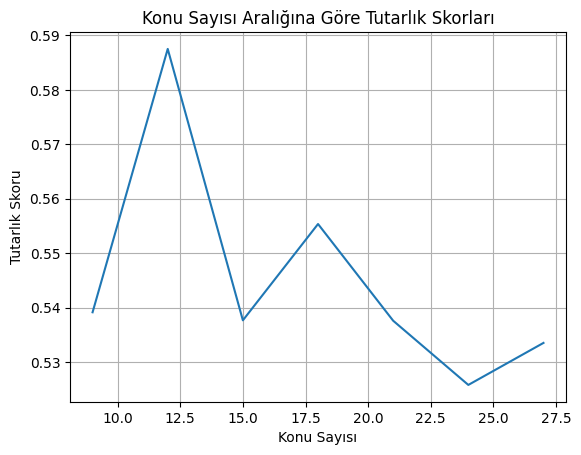

In [51]:
# Tutarlık Skorlarını Görselleştirme
import matplotlib.pyplot as plt

plt.plot(konu_sayisi_listesi, tutarlilik_skorlar_listesi, "-")
plt.xlabel("Konu Sayısı")
plt.ylabel("Tutarlık Skoru")
plt.title("Konu Sayısı Aralığına Göre Tutarlık Skorları")
plt.grid()
plt.show()

In [52]:
#Oluşturulan soyut konular içerisinde en fazla bulunan terimler

konular =lda_model.print_topics(num_words=7)
konular = sorted(konular, key= lambda x: x[0])
for konu in konular:
  print(konu)

(0, '0.010*"hapis" + 0.010*"hakkında" + 0.009*"yıl" + 0.008*"ceza" + 0.008*"fetö" + 0.007*"terör" + 0.007*"kararı"')
(1, '0.067*"yüzde" + 0.018*"göre" + 0.018*"dolar" + 0.017*"milyar" + 0.011*"milyon" + 0.010*"bin" + 0.009*"tl"')
(2, '0.009*"sınav" + 0.009*"olarak" + 0.008*"olan" + 0.006*"tarafından" + 0.006*"zaman" + 0.006*"ilgili" + 0.006*"sağlık"')
(3, '0.014*"polis" + 0.012*"olay" + 0.009*"kişi" + 0.009*"ekipleri" + 0.007*"gözaltına" + 0.006*"sağlık" + 0.006*"edildi"')
(4, '0.027*"tanzim" + 0.026*"satış" + 0.018*"gıda" + 0.013*"et" + 0.013*"sebze" + 0.012*"tarım" + 0.010*"meyve"')
(7, '0.026*"abd" + 0.011*"başkanı" + 0.011*"suriye" + 0.009*"trump" + 0.008*"rusya" + 0.008*"türkiye" + 0.007*"venezuela"')
(8, '0.012*"kadın" + 0.009*"eğitim" + 0.007*"kadınlar" + 0.007*"olarak" + 0.006*"olan" + 0.006*"dünya" + 0.005*"mart"')
(9, '0.019*"var" + 0.009*"değil" + 0.007*"yok" + 0.007*"erdoğan" + 0.007*"bizim" + 0.006*"bunu" + 0.006*"ben"')
(10, '0.033*"künye" + 0.016*"kültür" + 0.016*"çikola

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
# Tutarlılık Skorunun Hesaplanması
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenlastirilmis_metinler, dictionary=kelime_listesi, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nTutarlılık Skoru: ', coherence_lda)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Tutarlılık Skoru:  0.5335217049839124


In [54]:
# Görselleştirme
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, dokuman_terim_matrisi, kelime_listesi)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.246804  0.063627       1        1  11.321612
18    -0.141719  0.067931       2        1   8.198820
15     0.132572  0.159262       3        1   6.312105
3      0.023153 -0.135212       4        1   6.061585
25     0.103777 -0.061979       5        1   5.444024
17     0.093344 -0.181224       6        1   5.334060
8      0.095205 -0.049322       7        1   5.314697
12     0.144963 -0.120745       8        1   5.146168
7      0.083917  0.019833       9        1   4.523955
19     0.215702 -0.007410      10        1   4.123061
22     0.070117  0.164783      11        1   3.885062
0      0.052387  0.012016      12        1   3.878118
2      0.021798  0.125078      13        1   3.827593
26     0.070067 -0.001882      14        1   3.251566
1     -0.089553  0.128449      15        1   2.700010
13    -0.020308 -0.097707      16        1   2.688299
20    -0.049911 -0.056763      17        1   2.450669
14    -0.076834  0.118902      18        1   2.311258
6     -0.163376  0.006997      19        1   1.989845
23    -0.120382  0.068830      20        1   1.961092
21    -0.063953  0.172296      21        1   1.898781
5     -0.059435 -0.239519      22        1   1.785416
16    -0.137323 -0.089304      23        1   1.478066
10    -0.043387  0.027540      24        1   1.297203
4     -0.091698  0.058649      25        1   1.142784
11    -0.116709 -0.071281      26        1   1.030967
24    -0.179218 -0.081844      27        1   0.643183, topic_info=             Term          Freq         Total Category  logprob  loglift
1888     yorumlar  48828.000000  48828.000000  Default  30.0000  30.0000
4534        yorum  75230.000000  75230.000000  Default  29.0000  29.0000
78          yüzde  36332.000000  36332.000000  Default  28.0000  28.0000
25684   haberturk  39141.000000  39141.000000  Default  27.0000  27.0000
580           com  44547.000000  44547.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
7149        güney    545.105600   2819.179675  Topic27  -5.3186   3.4033
621      haberler    609.065215  13601.096564  Topic27  -5.2077   1.9405
98       arasında    616.060719  22389.006038  Topic27  -5.1963   1.4535
802       bulunan    579.635748  18715.876050  Topic27  -5.2572   1.5718
402    tarafından    566.074757  38689.253373  Topic27  -5.2809   0.8219

[1939 rows x 6 columns], token_table=      Topic      Freq Term
term                      
5234      3  0.608574   ab
5234      9  0.390948   ab
5234     19  0.000216   ab
1551      9  0.924714  abd
1551     15  0.055404  abd
...     ...       ...  ...
1103      9  0.016117   ’ü
1103     14  0.011158   ’ü
1103     15  0.692197   ’ü
1103     18  0.073972   ’ü
1103     19  0.000413   ’ü

[8139 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 19, 16, 4, 26, 18, 9, 13, 8, 20, 23, 1, 3, 27, 2, 14, 21, 15, 7, 24, 22, 6, 17, 11, 5, 12, 25])